In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
from itertools import product, combinations

from paths import *
from ssd_paths import *
from misc_recorder import *

In [2]:
hyper_dir = model_save_
ts = "0121212817"

In [3]:
class ResReader: 
    def __init__(self, dir, runtype="ff", cv="full"):
        self.dir = dir
        self.runtype = runtype
        self.cv = cv
    
    def read(self):
        read_dir = os.path.join(self.dir, self.cv, self.runtype)
        train = ListRecorder(os.path.join(read_dir, 'train.acc'))
        valid = ListRecorder(os.path.join(read_dir, f'valid.acc'))
        fullvalid = ListRecorder(os.path.join(read_dir, f'full_valid.acc'))
        train.read()
        valid.read()
        fullvalid.read()
        return train.get(), valid.get(), fullvalid.get()

In [5]:
reses = {}
for run_case in range(1, 6): 
    dir = os.path.join(hyper_dir, f"H12-{ts}-{run_case}", "large")
    for runtype, cv in list(product(["lf", "hf"], ["c", "v"])):
        res = ResReader(dir, runtype=runtype, cv=cv).read()
        val = np.mean([x - y for x, y in zip(res[1], res[2])][15:20])
        # val = np.mean(res[2][35:40])
        if f"{runtype}-{cv}" in reses.keys(): 
            reses[f"{runtype}-{cv}"].append(val)
        else: 
            reses[f"{runtype}-{cv}"] = [val]

In [6]:
reses

{'lf-c': [0.15747814081914405,
  0.188403129314312,
  0.14763000460193282,
  0.1404509894155545,
  0.16079153244362634],
 'lf-v': [0.09464114832535883,
  0.09961722488038276,
  0.09808612440191389,
  0.11253588516746411,
  0.07655502392344496],
 'hf-c': [0.16474919466175794,
  0.22788771283939252,
  0.18242061665899678,
  0.20368154624942472,
  0.18232857800276114],
 'hf-v': [0.18401913875598083,
  0.11110047846889952,
  0.1168421052631579,
  0.1600956937799043,
  0.2103349282296651]}

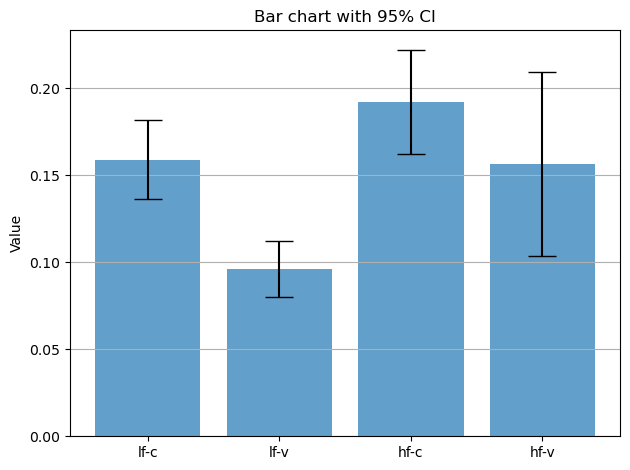

In [7]:
data = list(reses.values())

# Function to calculate mean and 95% CI
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    margin = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, margin

# Calculate means and CIs
means = [mean_confidence_interval(group)[0] for group in data]
cis = [mean_confidence_interval(group)[1] for group in data]

# Plotting
fig, ax = plt.subplots()
x_pos = np.arange(len(data))
ax.bar(x_pos, means, yerr=cis, align='center', alpha=0.7, ecolor='black', capsize=10)
ax.set_ylabel('Value')
ax.set_xticks(x_pos)
ax.set_xticklabels(reses.keys())
ax.set_title('Bar chart with 95% CI')
ax.yaxis.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
for a, b in list(combinations(reses.keys(), 2)): 
    print(a, b, stats.ttest_ind(reses[a], reses[b]))

lf-c lf-v TtestResult(statistic=6.244839374236373, pvalue=0.00024708789809278086, df=8.0)
lf-c hf-c TtestResult(statistic=-2.4470272792645433, pvalue=0.040122319306627505, df=8.0)
lf-c hf-v TtestResult(statistic=0.11890894923267921, pvalue=0.9082791504408734, df=8.0)
lf-v hf-c TtestResult(statistic=-7.803181539832211, pvalue=5.222100245994996e-05, df=8.0)
lf-v hf-v TtestResult(statistic=-3.0147162018483797, pvalue=0.016693222403766344, df=8.0)
hf-c hf-v TtestResult(statistic=1.626476427370204, pvalue=0.1425005439288532, df=8.0)
